# Membership Modelling - Quick Demo 

Simple membership modelling techniques for data selection.

### Import the packages

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.svm import SVC
from sklearn.svm import OneClassSVM
from sklearn.gaussian_process.kernels import RBF
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import make_moons, make_circles, make_classification

### Initialization

In [2]:
SEED = 42
SAMPLE_SIZE = 1000
TRAIN_SIZE = int(0.8 * SAMPLE_SIZE)


### Create Dummy Data

In [3]:
X_target, y_target = np.random.multivariate_normal(np.zeros(2), np.eye(2), size=1000), np.ones(SAMPLE_SIZE)
X_source, y_source = np.random.multivariate_normal(np.zeros(2) + 3, np.eye(2), size=1000), np.zeros(SAMPLE_SIZE)

X_train = np.concatenate((X_target[:TRAIN_SIZE,:], X_source[:TRAIN_SIZE,:]), axis = 0)
y_train = np.append(y_target[:TRAIN_SIZE], y_source[:TRAIN_SIZE])

X_test = np.concatenate((X_target[TRAIN_SIZE:,:], X_source[TRAIN_SIZE:,:]), axis = 0)
y_test = np.append(y_target[TRAIN_SIZE:], y_source[TRAIN_SIZE:])

In [4]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1600, 2)
(1600,)
(400, 2)
(400,)


### Let's see the data

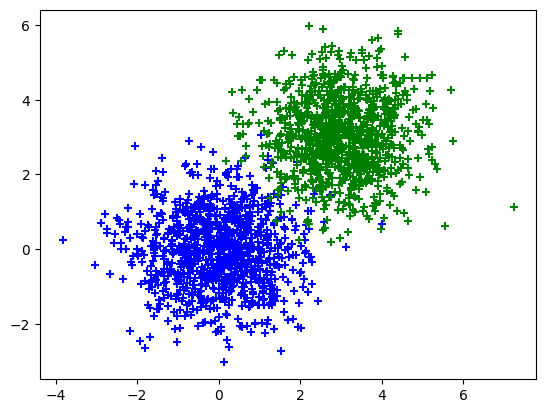

In [5]:
fig = plt.figure()

plt.scatter(X_target[:,0], X_target[:,1], c= 'blue', marker='+')
plt.scatter(X_source[:,0], X_source[:,1], c= 'green', marker='+')

## One-Class SVM

In [6]:
osvm = OneClassSVM(gamma='auto', nu=0.2)
osvm.fit(X_target)

OneClassSVM(gamma='auto', nu=0.2)

### Let's see the model

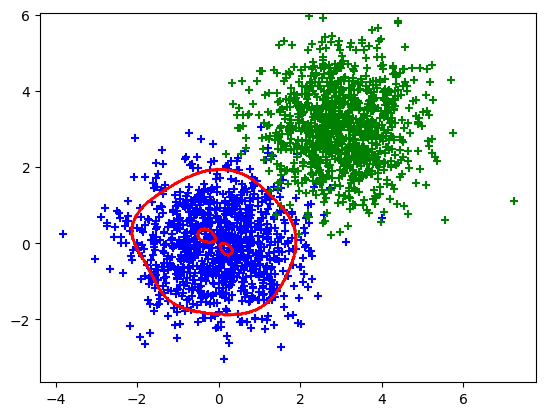

In [7]:
fig = plt.figure()
plt.scatter(X_target[:,0], X_target[:,1], c= 'blue', marker='+')
plt.scatter(X_source[:,0], X_source[:,1], c= 'green', marker='+')

h = .02
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = osvm.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='red') #cmap=plt.get_cmap('autumn')) #cmap=plt.cm.Paired)

In [8]:
s_weights = osvm.decision_function(X_source)
sorted(s_weights)[::-1][:10]


[0.7585930265806056,
 -0.053951949212326156,
 -0.31886730180340095,
 -0.577166608808426,
 -1.2067883138541973,
 -1.7262482805079387,
 -2.6244446521249643,
 -3.102331604600778,
 -3.413867224431847,
 -3.618789578595667]

## Two-Class Linear SVM

In [9]:
tsvm = SVC(kernel="linear", C=0.025)
tsvm.fit(X_train, y_train)

SVC(C=0.025, kernel='linear')

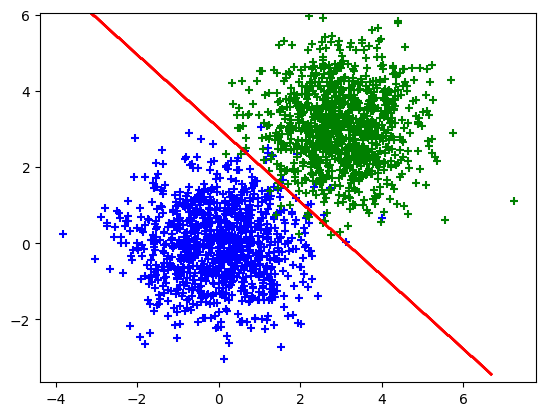

In [10]:
fig = plt.figure()
plt.scatter(X_target[:,0], X_target[:,1], c= 'blue', marker='+')
plt.scatter(X_source[:,0], X_source[:,1], c= 'green', marker='+')

h = .02
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = tsvm.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='red') #cmap=plt.get_cmap('autumn')) #cmap=plt.cm.Paired)

In [11]:
s_weights = tsvm.decision_function(X_source)
sorted(s_weights)[::-1][:20]


[0.8378891017267194,
 0.7965917241248817,
 0.5100021165056727,
 0.4500198558103028,
 0.4072605486115335,
 0.29802791705695153,
 0.1874408554960465,
 0.17502496822063263,
 0.15374018272932055,
 0.15280553464019375,
 0.12981933413512747,
 0.10733889328303725,
 0.02699521525124915,
 0.018680381667277146,
 -0.031340168026982695,
 -0.05774832571732702,
 -0.0711440566968422,
 -0.12096952527264992,
 -0.13036293088555428,
 -0.16148232892996006]

## Two-Class RBF SVM

In [12]:
rbf_tsvm = SVC(gamma=2, C=1)
rbf_tsvm.fit(X_train, y_train)

SVC(C=1, gamma=2)

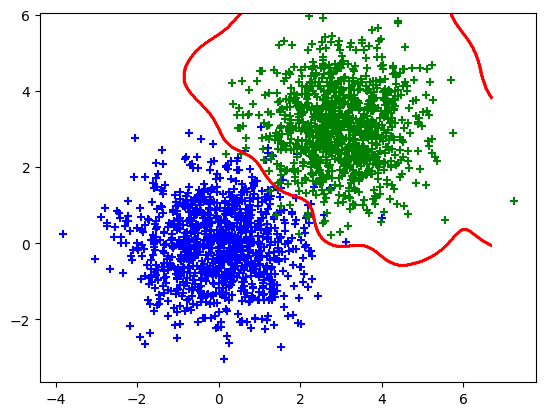

In [13]:
fig = plt.figure()
plt.scatter(X_target[:,0], X_target[:,1], c= 'blue', marker='+')
plt.scatter(X_source[:,0], X_source[:,1], c= 'green', marker='+')

h = .02
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = rbf_tsvm.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='red') #cmap=plt.get_cmap('autumn')) #cmap=plt.cm.Paired)

In [14]:
s_weights = rbf_tsvm.decision_function(X_source)
sorted(s_weights)[::-1][:20]


[1.2050490795078441,
 1.0304561066902989,
 0.8632359254131428,
 0.6992933756514189,
 0.683451575810124,
 0.64154647662492,
 0.5509279668587482,
 0.4089069374420419,
 0.3972339654715069,
 0.1646146810649315,
 -0.019213561343072463,
 -0.17177573088873754,
 -0.4208084932883643,
 -0.478092244460487,
 -0.48005751210815745,
 -0.5136071377542409,
 -0.5183781126941346,
 -0.5438987281039681,
 -0.5779565837353783,
 -0.5830891997638921]